#### Importing libraries

In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Loading data

In [421]:
df = pd.read_csv('house_price.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,16160000000,3,True,True,True,Pasdaran,16160000000,538666.67
1,8400000000,2,True,True,True,Gheitarieh,8700000000,290000.00
2,3310000000,2,True,True,True,Ostad Moein,3310000000,110333.33
3,2550000000,2,True,True,True,Central Janatabad,2550000000,85000.00
4,3600,2,False,False,False,Shahryar,9720000000,324000.00


#### Remove missing data

In [422]:
df.dropna(axis=0, inplace=True)

In [423]:
df.index = range(len(df))

#### Data visualization

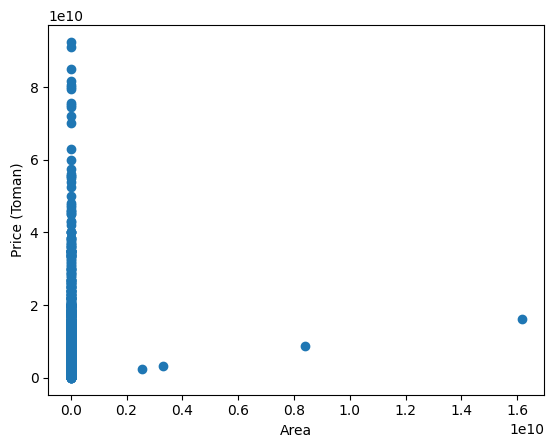

In [424]:
plt.scatter(df['Area'], df['Price'])
plt.xlabel('Area')
plt.ylabel('Price (Toman)')
plt.show()

#### Removing incorrect/outlier data (Decided by the scatters above)

In [425]:
for i in df.index:
    if df.loc[i, 'Area'] > 1500:
        df.drop(index=i, inplace=True)

##### Let's take another look at the scatter above

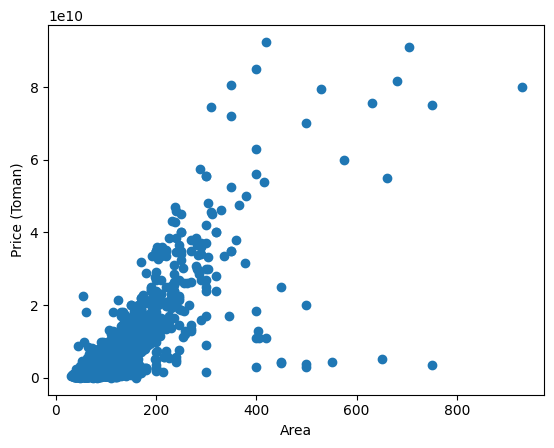

In [426]:
plt.scatter(df['Area'], df['Price'])
plt.xlabel('Area')
plt.ylabel('Price (Toman)')
plt.show()

#### Training our model

##### I choose area and room features for prediction. The reason is domain knowlage of real estate that almost everybody has.

In [510]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [428]:
x = df[['Area', 'Room']]
y = df[['Price']]

##### Splitting into train and test

In [537]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [538]:
reg = LinearRegression()
reg.fit(x_train, y_train)
score = reg.score(x_test, y_test)
print(f"Score: {score}")

Score: 0.7115006790849492
